In [1]:
import gradio as gr 
from sklearn.neural_network import MLPClassifier 
import torchvision.datasets as datasets 
import seaborn as sns 

#dark mode seaborn 
sns.set_style("darkgrid")

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

100%|██████████| 9912422/9912422 [00:00<00:00, 15792660.72it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33043015.23it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 9590167.01it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12370473.23it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
print(mnist_trainset.data.shape)
print(mnist_testset.data.shape)
print(mnist_trainset.targets.shape)
print(mnist_testset.targets.shape)



torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([60000])
torch.Size([10000])


In [4]:
X_train = mnist_trainset.data
y_train = mnist_trainset.targets
X_test = mnist_testset.data
y_test = mnist_testset.targets


In [5]:
X_train = X_train.numpy() 
X_test = X_test.numpy()
y_train = y_train.numpy()
y_test = y_test.numpy()

<AxesSubplot:ylabel='Count'>

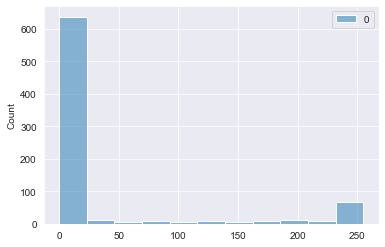

In [6]:
sns.histplot(data = X_train[0].reshape(784,1))

<AxesSubplot:>

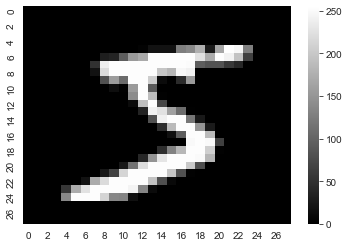

In [7]:
#plot the first image 
sns.heatmap(X_train[0], cmap = "gray")

In [8]:
X_train = X_train.reshape(60000, 784)/255.0
X_test = X_test.reshape(10000, 784)/255.0

In [9]:
#train the model 
mlp = MLPClassifier(hidden_layer_sizes=(32,32))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 32))

In [10]:
#print the accuracies 
print("Training Accuracy: ", mlp.score(X_train, y_train))
print("Testing Accuracy: ", mlp.score(X_test, y_test))

Training Accuracy:  0.99955
Testing Accuracy:  0.9674


In [11]:
def predict(img):
    img = img.reshape(1,784)/255.0
    prediction = mlp.predict(img)[0]
    return int(prediction)

In [12]:
gr.Interface(fn= predict, inputs = "sketchpad", outputs ="label").launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
